# Introduction to pairs testing

The aim of this is to gain a practical understanding of what pairs testing is through experimenting with the 'yfinance' module on python.

#### What I already know:
This is a new area for me but from what I understand pairs testing is about finding a pair of stocks that show a relationship in the sense that patterns can be found in the way they converge or diverge. This allows traders to go long in one stock and short the other and pocket the difference between the two.

#### What I plan to do:
My aim is to do some digging on the internet and some basic investigation by playing around with some stocks that one would assume to have a relationship. In doing so I hope to gain a better understanding on the practicality and purpose of this in the world of trading. I also hope to learn some methods or processes that may be applicable to see a basic form of how stocks are analysed.

## Initial Research
### A more official definition 
A pairs trade is a trading strategy that pairs a long position with a short position in two stocks that have a high correlation. The strategy makes use of statistics to obtain market-neutral profits - this means that the focus of the trade isn't dependent on the direction the stocks move but more so the relationship between the stocks.
### Things traders look for
Traders look for stocks with historical evidence of high correlation. They monitor the pair until there is a discrepancy, with the intention that they will eventually behave normal again - this allows them to profit off of the small deviation. A trader would aim to short the overperforming stock and long the underperforming stock, hoping to use the deviation as an indicator for future price movements.
### The pros and cons
The main advantage of pairs trading is the mitigation of directional risk and the profit from the two stocks correcting themselves. There are also several negatives. Firstly, the task of finding such highly correlated stocks can be quite difficult. Secondly, this strategy takes a strong stance on historical evidence - this is not always the most accurate way of determining future prices.
### First thoughts
My initial thought is where to start looking to find two stocks of such similarity. How do I go about analysing their correlation - from day to day or just through the time frame I want to use or a completely different way? How far do should they have to deviate for me to hypothetically take positions in each of the pairs and how do I determine the size/ratio of my position?

## First attempts
I will start by selecting a group of firms in the same sector and look at the relationships between them - both visually and through statistical analyses such as covariance matrices. The sector I plan to look at is the technology sector (NASDAQ100), I will also be using python to run my analyses.


In [4]:
# Import relevant modules
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import requests
import pandas as pd

# Retrieve Data on the NASDAQ 100
url = "https://en.wikipedia.org/wiki/Nasdaq-100"
headers = {"User-Agent": "Mozilla/5.0"}  
html = requests.get(url, headers=headers).text

tables = pd.read_html(html)
tickers = tables[4]["Ticker"].tolist()

C:\Users\callu\AppData\Local\Temp\ipykernel_16756\3575390356.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


['ADBE', 'AMD', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'AAPL']


In [6]:
# Create a dataframe
returns_df = pd.DataFrame()
# Make table for each ticker and add daily returns
for ticker in tickers:
    stock = yf.download(ticker, start="2024-01-01",end="2025-01-01",auto_adjust=False)
    returns_df[ticker] = stock["Adj Close"].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

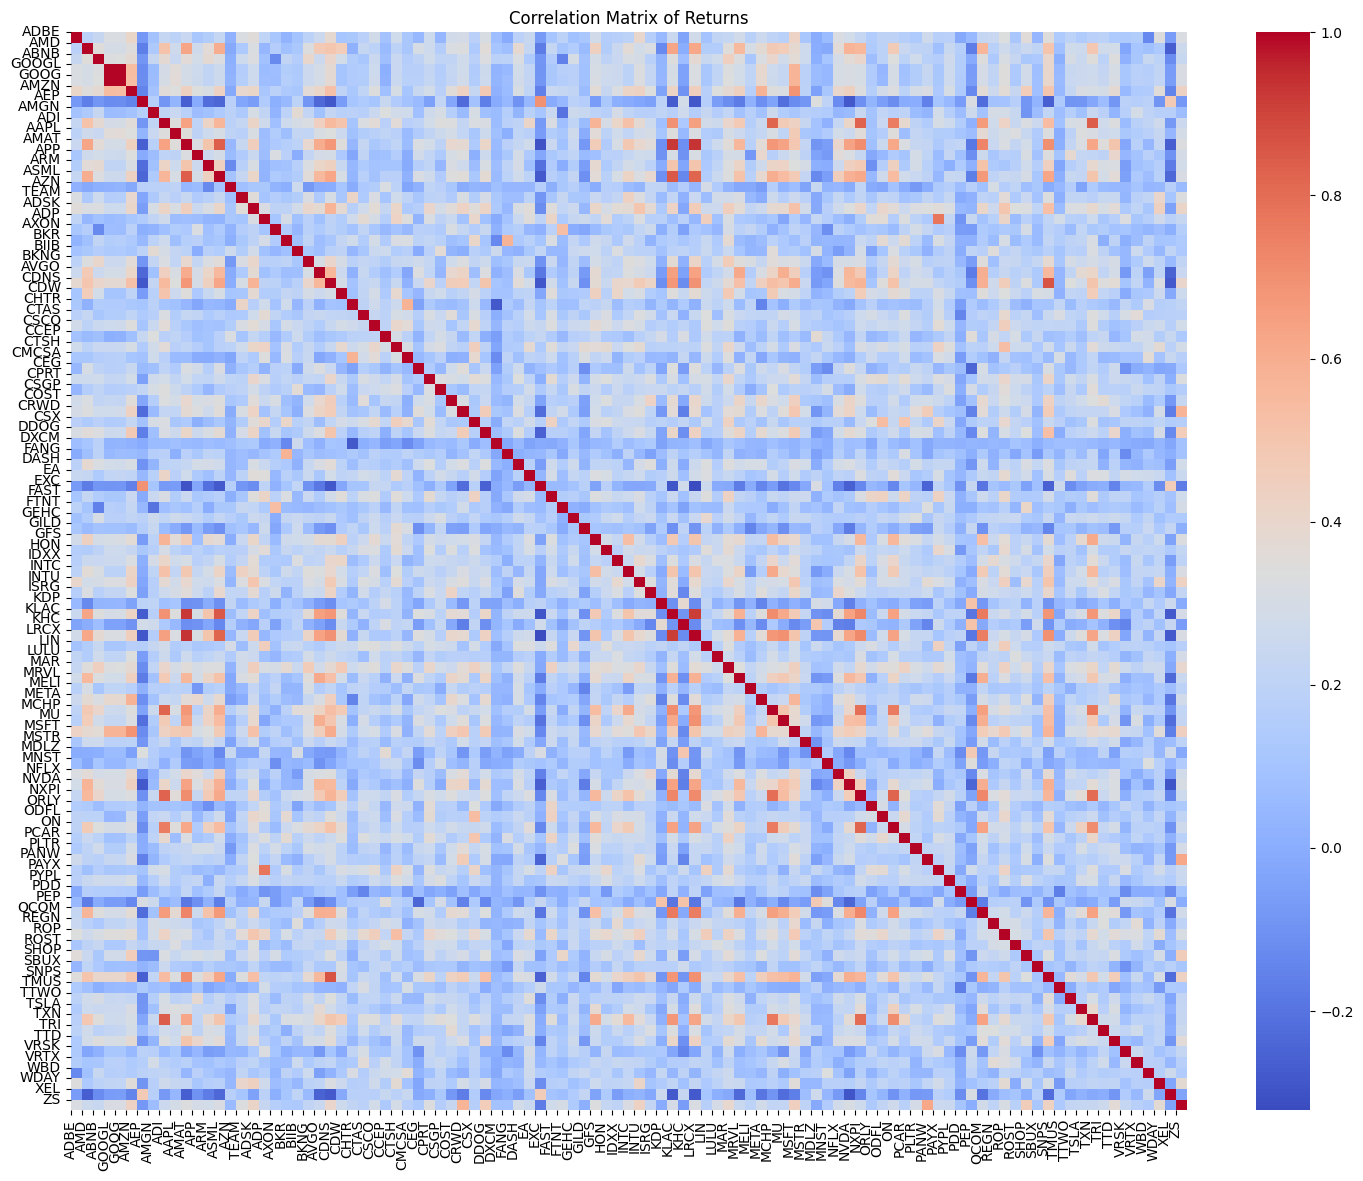

In [7]:
# Create a correlation matrix for returns
corr_matrix = returns_df.corr()
plt.figure(figsize=(18,14))
# Generate a heatmap to visualise the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)  
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.index)), labels=corr_matrix.index, rotation=0)
plt.title("Correlation Matrix of Returns")
plt.show()

We can see that there are very limited pairs with strong correlations. We plot the returns of a few against each other to confirm the positive correlation.

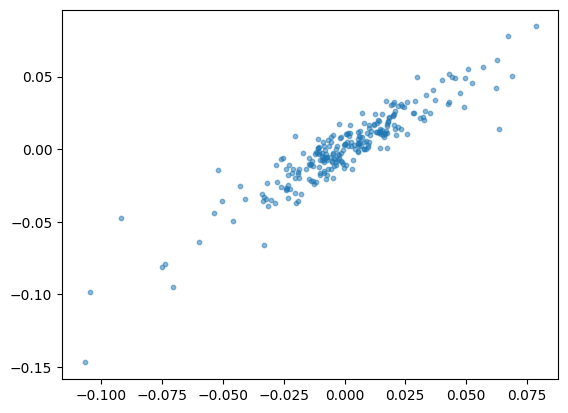

In [8]:
# AMAT vs KLAC
plt.scatter(x=returns_df["AMAT"],y=returns_df["KLAC"], s=10, alpha=0.5)

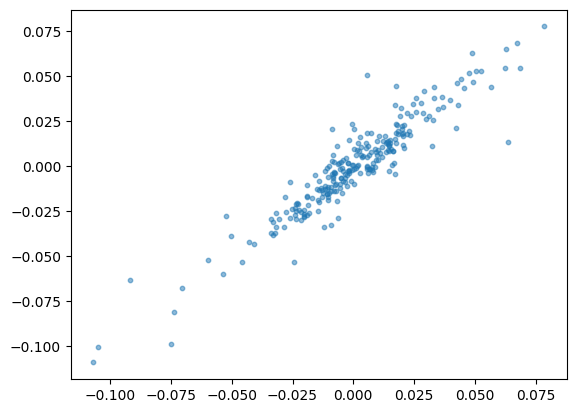

In [9]:
# AMAT vs LRCX
plt.scatter(x=returns_df["AMAT"],y=returns_df["LRCX"], s=10, alpha=0.5)

In [80]:
# Identify company names
AMAT = yf.Ticker("AMAT")
print(AMAT.info["longName"])
LRCX = yf.Ticker("LRCX")
print(LRCX.info["longName"])
KLAC = yf.Ticker("KLAC")
print(KLAC.info["longName"])

Applied Materials, Inc.
Lam Research Corporation
KLA Corporation


## First look findings
I decided to focus on the technology sector using the NASDAQ100 index. Initially I was trying to find the covariance matrix but quickly changed to finding the correlation matrix as a standarised measure for comparison was needed. I then visualised the correlations between pairs using a heatmap. Whilst there was little correlation between the vast majority of stocks glimpses of orange (strong correlation) could be seen. Out of these two sets of stocks were a dark shade of red. These stocks were found to be: Applied Materials, Inc and Lam Research Corporation, with a correlation of 0.93 meaning they should be strong candidates to test for the pairs trading strategy.
### My Updated concerns and questions
Some of my previous questions still remain. For example, what ratio should be used when holding positions? Is 1:1 a norm? Does it depend on some other metric? Along with some new questions - visualisation wasn't necessarily clean and I only used 100 stocks, how does that differ for much larger sets of data? What are the next steps, I have determined a correlation between two sets of stocks but how do I go about measuring their deviations, over a certain time period? 

### The next steps
I will research entry and exit methods relating to this trading strategy, looking into the timeframes to look into, amount of each positions to hold and then apply this to my pairs of stocks, calculating hypothetical profit/losses.

## Second Stage Research
Although referred to as pairs trading, it can be applied to an n-dimensional portfolio.
It seems as though there are several approaches to pairs trading. 1) Distance Approach: Where different distance metrics such as pearson correlation, angular distance and distance correlation are all used as threshold to trigger trading signals. 2) Cointegration Approach is a phrase that has appeared a lot with looking into pairs trading. It refers to identifying a true relationship between two stocks rather than just a similarly strong correlation with the market. This means that when one stock deviates by a significant amount, the chances are that it will return back to a similar value of its pair. 3) Time Series Approach: the idea that a regression can be fit from the spread between the two stocks (normally some formula with a beta scaling factor) to better help determine such trading signals.
A backtesting method - where your trading strategy is tested on historical data - should be used on the stocks. There are different ways of doing this including: The Walk Forward Method, where testing moves forward in time to prevent the impact of future information and can be considered historical simulation. This will be the method used for this project.

### The Methodology
The two pairs of stocks we will be using are AMAT & KLAC and AMAT & LRCX. I will plot the returns of each on a line graph to understand if there is a spread between them. Then I will make an attempt to calculate the mean spread and then check then set a threshold for them to deviate. If the deviation is too large I will use that as a signal for entry and then come up with an idea for exit. Tallying my profit and loss as it goes along. 

<Axes: xlabel='Date'>

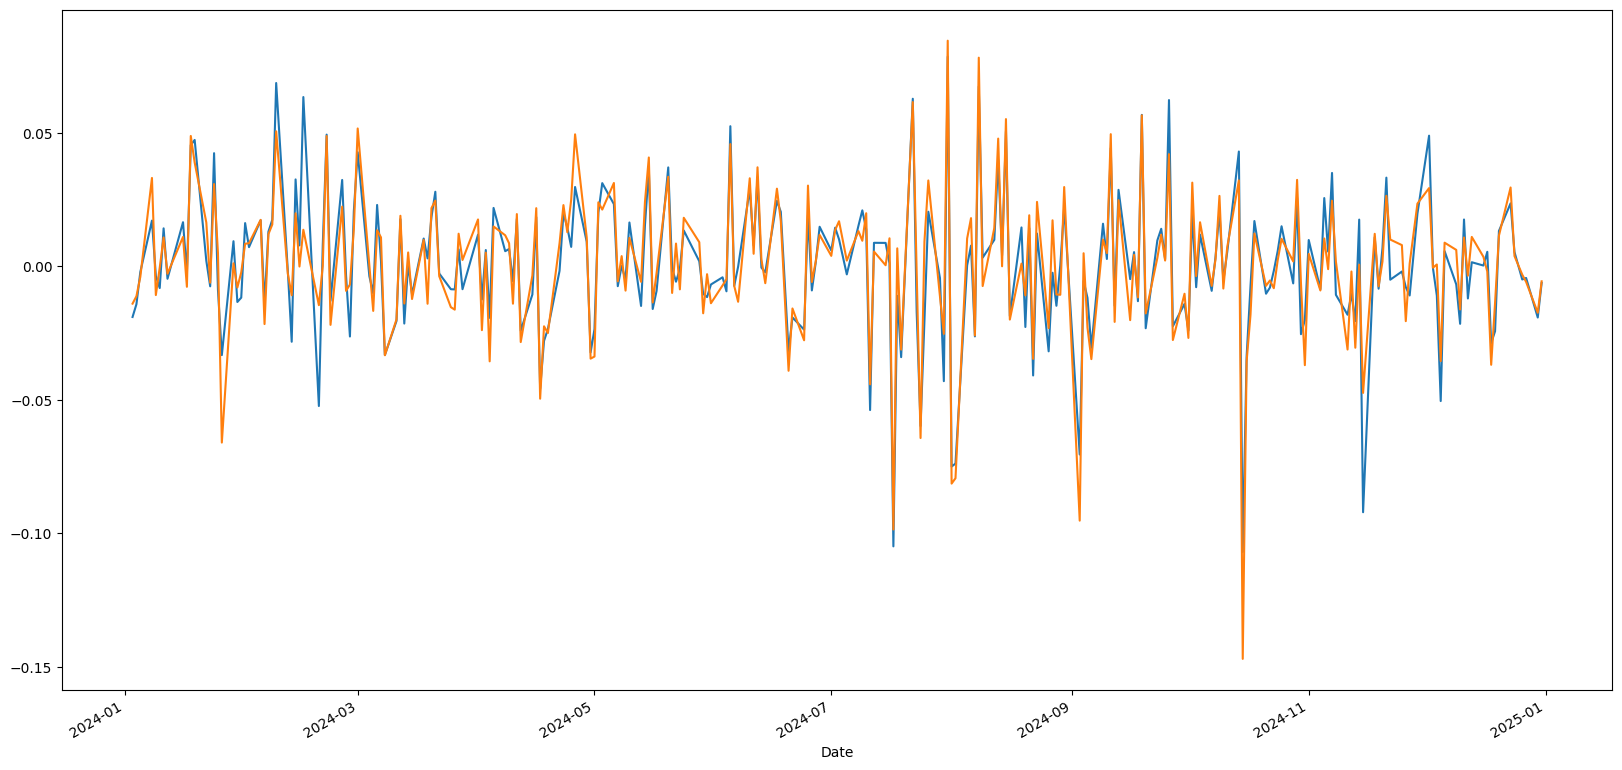

In [33]:
# Plot returns of AMAT vs KLAC
returns_df["AMAT"].plot(figsize=(20,10)) and returns_df["KLAC"].plot(figsize=(20,10))

In [82]:
# Create a dataframe for AMAT against KLAC
data_df1 = yf.download(["AMAT","KLAC"],start="2024-01-01",end="2025-01-01",auto_adjust=False)
data_df1.head()

[*********************100%***********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AMAT        KLAC        AMAT        KLAC        AMAT   
Date                                                                     
2024-01-02  151.953064  551.668335  154.369995  560.390015  160.110001   
2024-01-03  149.078796  543.989746  151.449997  552.590027  153.169998   
2024-01-04  146.972305  537.935486  149.309998  546.440002  152.000000   
2024-01-05  146.667160  535.838684  149.000000  544.309998  151.520004   
2024-01-08  149.187057  553.607605  151.559998  562.359985  152.789993   

Price                          Low                    Open              \
Ticker            KLAC        AMAT        KLAC        AMAT        KLAC   
Date                                                                     
2024-01-02  573.210022  153.429993  553.650024  160.000000  573.210022   
2024-01-03  558.250000  150.729996  550.000000  151.710007  552.000000   
2024-01-04  554.900024  148.750000  544.809998  149.800003  546.390015   
2024-01-05  551.349976  148.050003  542.409973  150.080002  548.109985   
2024-01-08  565.890015  149.720001  548.849976  149.830002  549.059998   

Price        Volume           
Ticker         AMAT     KLAC  
Date                          
2024-01-02  8607300   967500  
2024-01-03  6100100   819100  
2024-01-04  6196100   859900  
2024-01-05  5400100   767000  
2024-01-08  6515500  1268100

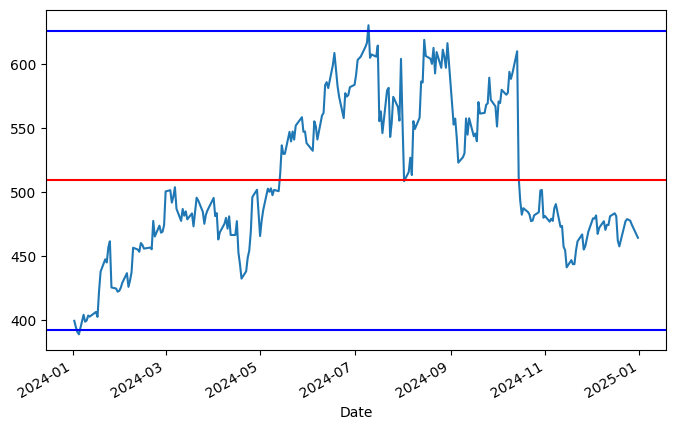

In [52]:
prices = data_df1["Adj Close"]
data_df1["Spread"] = prices["KLAC"] - prices["AMAT"]
spread_mean = data_df1["Spread"].mean()
data_df1["Spread"].plot(figsize=(8,5)) and plt.axhline(spread_mean,color="red")
spread_std = data_df1["Spread"].std()
spread_std
lower = spread_mean - (2*spread_std)
higher = spread_mean + (2*spread_std)
plt.axhline(entry,color="blue")
plt.axhline(exit,color="blue")

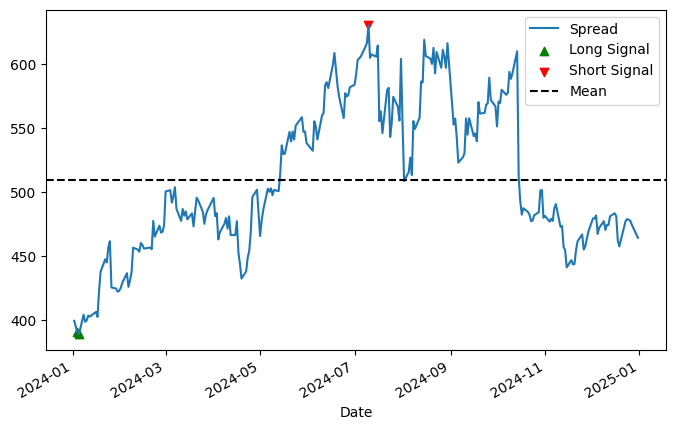

In [59]:
# Create a signal column
# Short spread: Short AMAT Long KLAC
# Long Spread: Long AMAT, Short KLAC
# Create signal column
data_df["Signal"] = 0
# Highlight positions where the spread is 2 Std Devs lower than the mean with a 1
data_df.loc[data_df["Spread"] < lower, "Signal"] = 1
# Highlight positions where the spread is 2 Std Devs higher than the mean with a -1
data_df.loc[data_df["Spread"] > higher, "Signal"] = -1
# Plot a linegraph of the spread
data_df["Spread"].plot(figsize=(8,5),label="Spread")
# Show a scatter of entry points for long spread positions
plt.scatter(
    data_df.index[data_df["Signal"] == 1],
    data_df["Spread"][data_df["Signal"] == 1],
    marker="^", color="green", label="Long Signal"
)

# Show a scatter of entry points for short spread positions
plt.scatter(
    data_df.index[data_df["Signal"] == -1],
    data_df["Spread"][data_df["Signal"] == -1],
    marker="v", color="red", label="Short Signal"
)

plt.axhline(spread_mean, color="black", linestyle="--", label="Mean")
plt.legend()
plt.show()

In [74]:
# Tracking P/L
# find price at time of entry and long/short 1000 / share price shares until the spread hits the mean again
# Calculate amount of shares
N = 1000  # dollars per leg
prices = data_df["Adj Close"]

# find all entry dates where Signal == 1
long_dates = data_df.index[data_df["Signal"] == 1]

for date in long_dates:
    entry_price = prices.loc[date, ["AMAT","KLAC"]]   # price at that date
    shares_A = N / entry_price["AMAT"]
    shares_B = N / entry_price["KLAC"]
    print(date, price, shares_A, shares_B)

2024-01-04 00:00:00 Ticker
AMAT    146.667160
KLAC    535.838684
Name: 2024-01-05 00:00:00, dtype: float64 6.804002958063542 1.8589589761656362
2024-01-05 00:00:00 Ticker
AMAT    146.667160
KLAC    535.838684
Name: 2024-01-05 00:00:00, dtype: float64 6.818158882785741 1.8662333080955957


In [79]:
# Find the date when it reverts to the mean
# Select entry of first dip
entry_date = long_dates[0]
# Slice past for data only after our entry
post_entry= data_df.loc[entry_date:]
# Find the date where the spread reverts to the mean
mean_revert_row = post_entry[post_entry["Spread"] >= spread_mean].iloc[0]
exit_date = mean_revert_row.name
exit_price = mean_revert_row["Adj Close"]
profit_A = shares_A * (exit_price["AMAT"] - entry_price["AMAT"])
profit_K = shares_B * (entry_price["KLAC"] - exit_price["KLAC"])
total_profit = profit_A + profit_K
print(exit_price, exit_total, profit_A, profit_K, total_profit)

Ticker
AMAT    206.884949
KLAC    721.622131
Name: 2024-05-14 00:00:00, dtype: float64 Ticker
AMAT    1410.574451
KLAC    1346.715257
dtype: float64 410.5744509013181 -346.715257379931 63.859193521387056


We can see that this would have given us a profit of just over 60 dollars. We repeat the process with our second pair.

<Axes: xlabel='Date'>

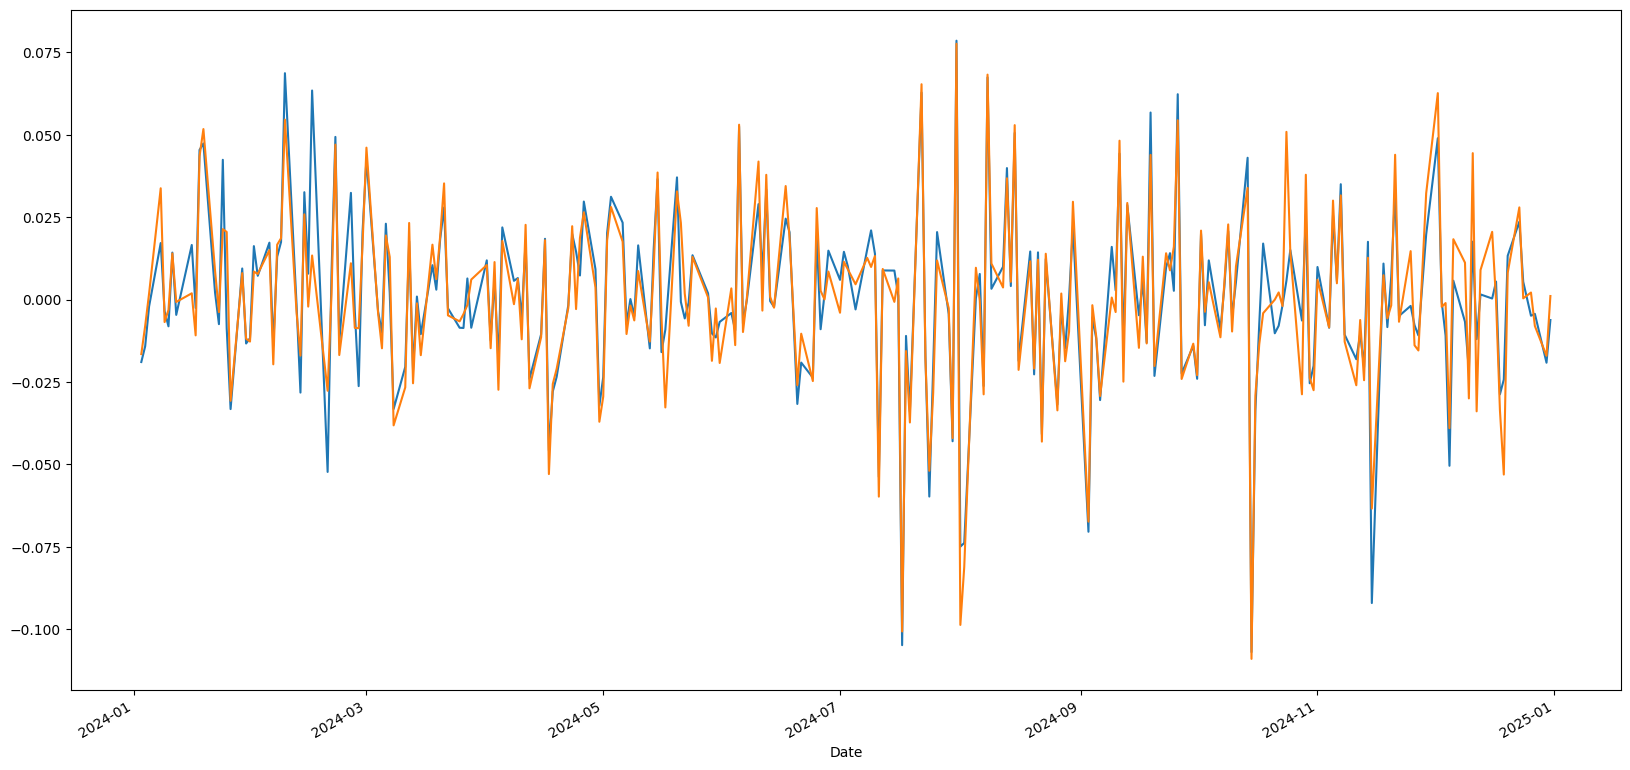

In [81]:
# Plot returns of AMAT vs LRCX
returns_df["AMAT"].plot(figsize=(20,10)) and returns_df["LRCX"].plot(figsize=(20,10))

In [83]:
# Create a dataframe for AMAT against KLAC
data_df2 = yf.download(["AMAT","LRCX"],start="2024-01-01",end="2025-01-01",auto_adjust=False)
data_df2.head()

[*********************100%***********************]  2 of 2 completed


Price        Adj Close                  Close                   High  \
Ticker            AMAT       LRCX        AMAT       LRCX        AMAT   
Date                                                                   
2024-01-02  151.953064  73.768700  154.369995  74.930000  160.110001   
2024-01-03  149.078796  72.550873  151.449997  73.693001  153.169998   
2024-01-04  146.972305  71.974930  149.309998  73.108002  152.000000   
2024-01-05  146.667160  72.104881  149.000000  73.239998  151.520004   
2024-01-08  149.187057  74.542519  151.559998  75.716003  152.789993   

Price                         Low                   Open              Volume  \
Ticker           LRCX        AMAT       LRCX        AMAT       LRCX     AMAT   
Date                                                                           
2024-01-02  76.938004  153.429993  74.207001  160.000000  76.875000  8607300   
2024-01-03  74.300003  150.729996  72.966003  151.710007  73.199997  6100100   
2024-01-04  74.490997  148.750000  72.324997  149.800003  72.578003  6196100   
2024-01-05  74.224998  148.050003  72.860001  150.080002  73.457001  5400100   
2024-01-08  75.769997  149.720001  73.634003  149.830002  73.634003  6515500   

Price                 
Ticker          LRCX  
Date                  
2024-01-02  11136000  
2024-01-03   9224000  
2024-01-04  10330000  
2024-01-05   8219000  
2024-01-08  10889000

108.21699617779444
14.345494514828065


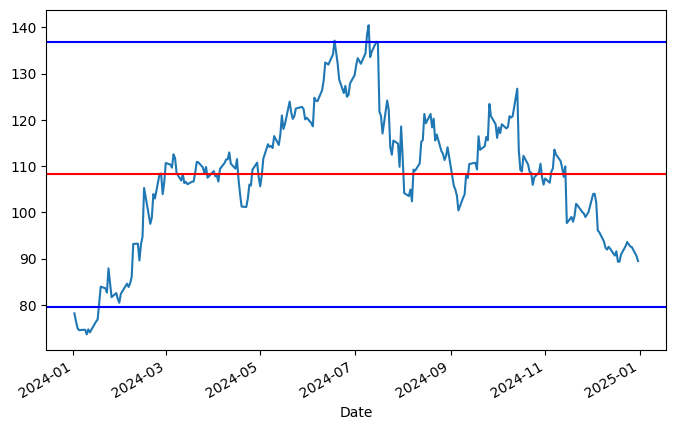

In [89]:
prices = data_df2["Adj Close"]
data_df2["Spread"] = prices["AMAT"] - prices["LRCX"]
spread_mean = data_df2["Spread"].mean()
print(spread_mean)
data_df2["Spread"].plot(figsize=(8,5)) and plt.axhline(spread_mean,color="red")
spread_std = data_df2["Spread"].std()
print(spread_std)
spread_std
lower = spread_mean - (2*spread_std)
higher = spread_mean + (2*spread_std)
plt.axhline(lower,color="blue")
plt.axhline(higher,color="blue")

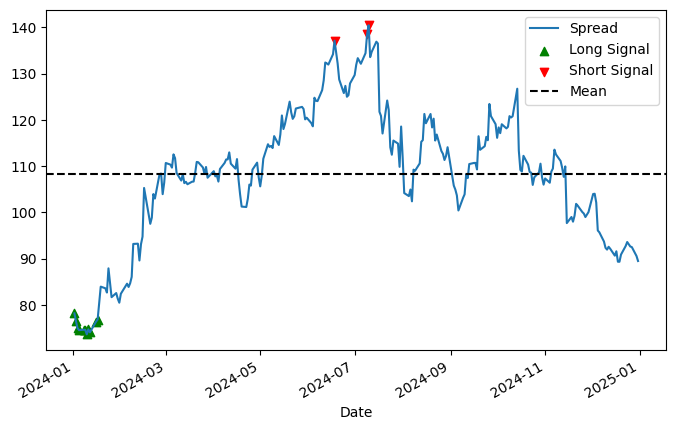

In [90]:
# Create a signal column
# Short spread: Short AMAT Long KLAC
# Long Spread: Long AMAT, Short KLAC
# Create signal column
data_df2["Signal"] = 0
# Highlight positions where the spread is 2 Std Devs lower than the mean with a 1
data_df2.loc[data_df2["Spread"] < lower, "Signal"] = 1
# Highlight positions where the spread is 2 Std Devs higher than the mean with a -1
data_df2.loc[data_df2["Spread"] > higher, "Signal"] = -1
# Plot a linegraph of the spread
data_df2["Spread"].plot(figsize=(8,5),label="Spread")
# Show a scatter of entry points for long spread positions
plt.scatter(
    data_df2.index[data_df2["Signal"] == 1],
    data_df2["Spread"][data_df2["Signal"] == 1],
    marker="^", color="green", label="Long Signal"
)

# Show a scatter of entry points for short spread positions
plt.scatter(
    data_df2.index[data_df2["Signal"] == -1],
    data_df2["Spread"][data_df2["Signal"] == -1],
    marker="v", color="red", label="Short Signal"
)

plt.axhline(spread_mean, color="black", linestyle="--", label="Mean")
plt.legend()
plt.show()

In [93]:
# Tracking P/L
# find price at time of entry and long/short 1000 / share price shares until the spread hits the mean again
# Calculate amount of shares
N = 1000  # dollars per leg
prices2 = data_df2["Adj Close"]

# find all entry dates where Signal == 1
long_dates2 = data_df2.index[data_df2["Signal"] == 1]

for date in long_dates:
    entry_price2 = prices2.loc[date, ["AMAT","LRCX"]]   # price at that date
    shares_A = N / entry_price2["AMAT"]
    shares_L = N / entry_price2["LRCX"]
    print(date, prices2, shares_A, shares_L)

2024-01-04 00:00:00 Ticker            AMAT       LRCX
Date                             
2024-01-02  151.953064  73.768700
2024-01-03  149.078796  72.550873
2024-01-04  146.972305  71.974930
2024-01-05  146.667160  72.104881
2024-01-08  149.187057  74.542519
...                ...        ...
2024-12-24  167.028046  73.425148
2024-12-26  166.214600  73.584267
2024-12-27  165.500336  72.997505
2024-12-30  162.335770  71.754356
2024-12-31  161.333801  71.833923

[252 rows x 2 columns] 6.804002958063542 13.8937266440659
2024-01-05 00:00:00 Ticker            AMAT       LRCX
Date                             
2024-01-02  151.953064  73.768700
2024-01-03  149.078796  72.550873
2024-01-04  146.972305  71.974930
2024-01-05  146.667160  72.104881
2024-01-08  149.187057  74.542519
...                ...        ...
2024-12-24  167.028046  73.425148
2024-12-26  166.214600  73.584267
2024-12-27  165.500336  72.997505
2024-12-30  162.335770  71.754356
2024-12-31  161.333801  71.833923

[252 rows x 2 co

In [96]:
# Find the date when it reverts to the mean
# Select entry of first dip
entry_date2 = long_dates2[0]
# Slice past for data only after our entry
post_entry2 = data_df2.loc[entry_date:]
# Find the date where the spread reverts to the mean
mean_revert_row2 = post_entry2[post_entry2["Spread"] >= spread_mean].iloc[0]
exit_date2 = mean_revert_row2.name
exit_price2 = mean_revert_row2["Adj Close"]
profit_A = shares_A * (exit_price2["AMAT"] - entry_price2["AMAT"])
profit_L = shares_L * (entry_price2["LRCX"] - exit_price2["LRCX"])
total_profit = profit_A + profit_L
print(exit_price, exit_total, profit_A, profit_L, total_profit)

Ticker
AMAT    200.702652
LRCX     92.421066
Name: 2024-02-26 00:00:00, dtype: float64 Ticker
AMAT    1410.574451
KLAC    1346.715257
dtype: float64 368.4225693793131 -281.7588023867701 86.66376699254295


## Conclusion

### Results
Looking at our results the pairs trading strategy worked. Using a capital of one thousand dollars per pair, a profit of over 130 dollars was realised. We can see that once the spread was more than 2 standard deviations lower than that of the mean spread, going long in AMAT and short in KLAC allowed us to remove any directional risk and gain from their spread reverting back to the mean. A slight concern of this is that, over our one year timeframe, this dip below our marked entry point only happened once. Therefore for a large/respectable profit to be made a much larger amount of shares should have been bought/sold.

### Evaluation of my project
This strategy showed a basic implementation and use and has several limitations. Firstly, no transaction costs were assumed - this would further reduce profits made. Secondly, our calculated mean spread was based on data throughout the year - this wouldn't have been possible in real time as it relied on data in the future, it would probably be more effective to focus on a moving average have more dynamic entry and exit positions. Furthermore, there were only few stocks with such high correlation - a concern raised at the beginning of the process which ended up to be true. However it should be noted a company with more computational power would be able to scale this hugely. I also used a simple 1:1 ratio when shorting or going long, whereas in industry a more common practice is to run a regression and have a beta coefficient for one of the stocks. My trades were very long lasting - around 4 months. This is likely to be unrealistic in the real world as there is too much exposure and risks the chance of the companies diverting and losing their correlation - as that doesn't necessarily determine a genuine relationship.

### Application to the real world
Pairs Trading introduced as a stratetgy in the 1980s. In the modern world it doesn't work as effectively as a sole strategy - meaning the concept of just calculating correlation and applying bands for entry and exit isn't profitable enough for businesses. This is due to several things: market inefficiencies lasted longer before, now the strategy is very well known, any deviations are very quickly noticed. This experiment didn't account for some real world characteristics including transaction costs, there are two positions taken up as well as bid ask spreads and slippages. However, pairs trading serves as a strong foundation for a lot of strategies today. Rather than correlation between stocks, firms run cointegration tests to understand underlying relationships between stocks. Hedge ratios are more formally calculated to maximise the opportunity for profit. Pairs trading is also a strategy that can be extended to n-dimensions allowing for portfolios to be made which can help with diversification to reduce unsystematic risk.